In [1]:
import pandas as pd
import numpy as np
import requests as req
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Dataset 1 (twitter_archive_enhanced.csv)

In [3]:
df_twe_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_twe_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Dataset 2 (image_predictions.tsv)

In [4]:
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#res = req.get(url)
#with open('image_prediction.tsv','wb') as twe_filer:
#    twe_filer.write(res.content)

In [5]:
df_twe_2 = pd.read_csv('image_prediction.tsv', sep = '\t')

In [6]:
df_twe_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Dataset 3 (tweet_json.txt)

#### Below is the code to query the additional data from twitter api,i didnt make use of this snippet of code because i wasnt granted twitter developer priviledges

In [7]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
#i wasnt granted twitter developer priviedges so i downloaded the data from udacity's server as tweet_json.txt file
Df = pd.read_json('tweet_json.txt', lines=True) #the file is read into a dataframe

In [9]:
Df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [10]:
df_twe_3 = Df[['id','retweet_count','favorite_count']]

In [11]:
df_twe_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
df_twe_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
len(df_twe_1.tweet_id.unique())

2356

In [15]:
df_twe_1.name.value_counts().sort_values(ascending=False)

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Pip             1
Scruffers       1
Cheryl          1
Alejandro       1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
df_twe_1[df_twe_1.name == 'None'].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1554,688898160958271489,NaN,NaN,2016-01-18 01:38:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688898160...,10,10,None,None,None,None,None
1171,720415127506415616,NaN,NaN,2016-04-14 00:55:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720415127...,10,10,None,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None


In [17]:
len(df_twe_1.doggo == 'None'),len(df_twe_1.floofer == 'None'),len(df_twe_1.pupper == 'None'),len(df_twe_1.puppo == 'None')

(2356, 2356, 2356, 2356)

In [18]:
len(df_twe_1.query('doggo != "None" and floofer != "None"'))

1

In [19]:
len(df_twe_1.query('doggo != "None" and pupper != "None"'))

12

In [20]:
len(df_twe_1.query('doggo != "None" and puppo != "None"'))

1

In [21]:
len(df_twe_1.query('floofer != "None" and pupper != "None"'))

0

In [22]:
len(df_twe_1.query('floofer != "None" and puppo != "None"'))

0

In [23]:
len(df_twe_1.query('pupper != "None" and puppo != "None"'))

0

In [24]:
df_twe_1.shape[0] - len(df_twe_1[df_twe_1.retweeted_status_id.isnull()])

181

In [25]:
df_twe_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [26]:
df_twe_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [27]:
len(df_twe_1.source.str.contains('href'))

2356

In [28]:
print('{}'.format(len(df_twe_1[~df_twe_1.in_reply_to_status_id.isnull()])))
df_twe_1[~df_twe_1.in_reply_to_status_id.isnull()].sample(5)

78


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2036,671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm just going to leave this one here as well....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906...,13,10,None,None,None,None,None
1914,674330906434379776,6.658147e+17,1.637468e+07,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1295,707983188426153984,7.079801e+17,2.319108e+09,2016-03-10 17:35:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@serial @MrRoles OH MY GOD I listened to all o...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None


In [29]:
len(df_twe_1[~df_twe_1['tweet_id'].isin(df_twe_2['tweet_id'])])

281

In [30]:
len(df_twe_1[~df_twe_1['tweet_id'].isin(df_twe_3['id'])])

2

In [31]:
df_twe_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1123,727175381690781696,https://pbs.twimg.com/media/ChdyJvdWwAA5HGd.jpg,2,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True
1438,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,0.036325,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake_Bay_retriever,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True


In [32]:
df_twe_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_twe_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Qualities issues

- There is retweets column in twitter achive dataset that are duplicates of actual tweets
- Many tweet_id(s) in the archive datasets are missing in the image_prediction datasets and the tweet.json datframe
- The html tags in source column is not important
- The ,in_reply_to_status_id and in_reply_to_user_id are in a inapprpropraite datatypes,timestamp is not in a datetime datatype,rating numerator and denominator should be float datatype
- some of the name column(dog name) is inappropriate and missing
- TimeStamp column is not in datetime datatype
- none string should be in nan format
- columns p1,p2,p3 in image_prediction datasets should be converted to a categoriacal datatype
- retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp will become empty after archive dataframe has dropped duplicates which will have to be dropped.
- drop the rows with missing tweets and dog name
- tweet_id should be converted to object datatype(string)

## Tidiness issues

- floofer,doggo,puppo,pupper columns should be in one column (dog stages)
- The three datasets are part of the same observational unit and should be merged into one (dataset: twitter_archive_master.csv as instructed)

## Data Cleaning

### Quality issue 1  - There is retweets column in twitter achive dataset that are duplicates of actual tweets

### solution -- create a new dataframe where theres no RT in text column and check using retweeted_status_id

In [34]:
df_twe_1_copy  = df_twe_1.copy()

In [35]:
df_twe_1_copy = df_twe_1_copy[~df_twe_1_copy.text.str.contains('RT @')]  # i had to put the @ sign in  front of Rt bacause some users tweet's ask others to RT

In [36]:
#use the retweeted status id to check if its been resolved
len(df_twe_1_copy[~df_twe_1_copy.retweeted_status_id.isnull()])

0

In [37]:
df_twe_1_copy.sample(1) #the tweets do not contain RT's anymore

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,None,None,None


### Quality issue 2 - Many tweet_id(s) in the archive datasets are missing in the image_prediction datasets

### solution -- remove rows in archive dataframe where tweet_id does not exists in image_prediction dataframe and the tweet.json dataframe

In [38]:
df_twe_1_copy = df_twe_1_copy[(df_twe_1_copy.tweet_id.isin(df_twe_2.tweet_id)) & df_twe_1_copy.tweet_id.isin(df_twe_3.id)]

In [39]:
len(df_twe_1_copy[~(df_twe_1_copy.tweet_id.isin(df_twe_2.tweet_id))])

0

In [40]:
len(df_twe_1_copy[~df_twe_1['tweet_id'].isin(df_twe_3['id'])])

0

### Quality issue 3 -- The html tags in source column is not important

### Solution -- replace the tags with empty strings

In [41]:
import re
df_twe_1_copy.source = df_twe_1_copy.source.apply(lambda x: re.sub(r'<(a|/a).*?>','',x))

In [42]:
df_twe_1_copy.source.value_counts() ## cleaned

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Quality issue 4 --- The in_reply_to_status_id and in_reply_to_user_id are in a inapprpropraite datatypes

### solution -- convert in_reply_to_status_id and in_reply_to_user_id to object datatypes and fill the missing values with zero,rating numerator and denominator should be float datatype

In [43]:
df_twe_1_copy.in_reply_to_status_id = df_twe_1_copy.in_reply_to_status_id.fillna(value=0)

In [44]:
df_twe_1_copy.in_reply_to_user_id = df_twe_1_copy.in_reply_to_user_id.fillna(value=0)

In [54]:
df_twe_1_copy.in_reply_to_status_id = df_twe_1_copy.in_reply_to_status_id.astype('object')
df_twe_1_copy.in_reply_to_user_id = df_twe_1_copy.in_reply_to_user_id.astype('object')
df_twe_1_copy.rating_numerator = df_twe_1_copy.rating_numerator.astype(np.float32)
df_twe_1_copy.rating_denominator = df_twe_1_copy.rating_denominator.astype(np.float32)

In [55]:
#thank you to my reviewer to this snippet of code
rating = df_twe_1_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [56]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       1994 non-null   object 
 2   in_reply_to_user_id         1994 non-null   object 
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   float32
 11  rating_denominator          1994 non-null   float32
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [59]:
df_twe_1_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1854,675534494439489536,0.0,0.0,2015-12-12 04:35:48 +0000,Twitter for iPhone,Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,11.0,10.0,a,None,None,None,None


### Question 5 -- some of the name column(dog name) is inappropriate and missing

### Solution -- change the inappropraite names to none,not nan because there are already some values in the column containing the value none

In [60]:
df_twe_1_copy['name'][df_twe_1_copy.name.str.islower()] = 'None'

In [61]:
df_twe_1_copy[~df_twe_1_copy.name.str.islower()].name.value_counts().sort_index(ascending = True).head(30)

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
Name: name, dtype: int64

In [62]:
df_twe_1_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1672,682389078323662849,0.0,0.0,2015-12-31 02:33:29 +0000,Twitter for iPhone,Meet Brody. He's a Downton Abbey Falsetto. Add...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078...,9.0,10.0,Brody,None,None,None,None


### Quality issue 6 -- TimeStamp column is not in datetime datatype

### solution -- convert the column into a datetime datatype

In [63]:
df_twe_1_copy.timestamp = pd.to_datetime(df_twe_1_copy.timestamp)

In [64]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       1994 non-null   object             
 2   in_reply_to_user_id         1994 non-null   object             
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   float32         

### Quality issue 8 - - columns p1,p2,p3 in image_prediction datasets should be converted to a categoriacal datatype

### Solution -- convert the columns to categorical type

In [65]:
df_twe_2_copy = df_twe_2.copy()

In [66]:
df_twe_2_copy[['p1','p2','p3']] = df_twe_2_copy[['p1','p2','p3']].astype('category')

In [67]:
df_twe_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   int64   
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 165.4+ KB


### Tidiness issue 1 --- floofer,doggo,puppo,pupper columns should be in one column

### solution -- place the three columns in one column (dog_stage) and drop the columns from the datasets

In [68]:
df_twe_1_copy['doggo'].value_counts().sort_values()

doggo      74
None     1920
Name: doggo, dtype: int64

In [69]:
df_twe_1_copy['floofer'].value_counts().sort_values()

floofer       8
None       1986
Name: floofer, dtype: int64

In [70]:
df_twe_1_copy['pupper'].value_counts().sort_values()

pupper     212
None      1782
Name: pupper, dtype: int64

In [71]:
df_twe_1_copy['puppo'].value_counts().sort_values()

puppo      23
None     1971
Name: puppo, dtype: int64

###### Thank you reviewer for this snippet of code 

In [72]:
# handle none
df_twe_1_copy.doggo.replace('None', '', inplace=True)
df_twe_1_copy.floofer.replace('None', '', inplace=True)
df_twe_1_copy.pupper.replace('None', '', inplace=True)
df_twe_1_copy.puppo.replace('None', '', inplace=True)

# merge into column
df_twe_1_copy['dog_stage'] = df_twe_1_copy.doggo + df_twe_1_copy.floofer + df_twe_1_copy.pupper + df_twe_1_copy.puppo

# handle multiple stages
df_twe_1_copy.loc[df_twe_1_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_twe_1_copy.loc[df_twe_1_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_twe_1_copy.loc[df_twe_1_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_twe_1_copy.loc[df_twe_1_copy.dog_stage == '', 'dog_stage'] = np.nan

In [73]:
#i didnt attempt to put dog's with multiple stages into multiple because i think it is better to know the actual stages of dog's with mutiple stages
df_twe_1_copy['dog_stage'].value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [74]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       1994 non-null   object             
 2   in_reply_to_user_id         1994 non-null   object             
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   float32         

In [75]:
df_twe_1_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
209,852226086759018497,0.0,0.0,2017-04-12 18:25:07+00:00,Twitter Web Client,Meet General. He wasn't content with the quali...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852226086...,14.0,10.0,General,,,,,NaN


In [76]:
df_twe_1_copy.dog_stage.value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [77]:
df_twe_1_copy.drop(columns=['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [78]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   in_reply_to_status_id       1994 non-null   object             
 2   in_reply_to_user_id         1994 non-null   object             
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   float32         

### Quality issue 7 - none string should be in nan format

### solution - replace the none strings with np.nan

In [79]:
df_twe_1_copy.replace('None',np.NaN,regex=True,inplace = True)

In [80]:
len(df_twe_1_copy[df_twe_1_copy.name.isnull()])

644

In [81]:
df_twe_1_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1803,676948236477857792,0.0,0.0,2015-12-16 02:13:31+00:00,Twitter for iPhone,This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6.0,10.0,Karl,NaN


### Quality issue 9 - retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp will become empty after archive dataframe has dropped duplicates which will have to be dropped.

### solution -- drop the three columns  from the dataframe

In [82]:
df_twe_1_copy.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace=True)

In [83]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1992 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   float32            
 8   rating_denominator     1994 non-null   float32            
 9   name                   1350 non-null   object             
 10  dog_stage              306 non-null    object             
dtypes: datetime64[ns, UTC](1), float32(2), int64(1), object(

### Quality issue 10 - drop the rows with missing tweets and dog name

In [84]:
df_twe_1_copy[df_twe_1_copy.text.isna()]  ##

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1274,709198395643068416,0.0,0.0,2016-03-14 02:04:08+00:00,Twitter for iPhone,NaN,https://twitter.com/dog_rates/status/709198395...,45.0,50.0,NaN,NaN
1583,687102708889812993,0.0,0.0,2016-01-13 02:43:46+00:00,Twitter for iPhone,NaN,https://twitter.com/dog_rates/status/687102708...,5.0,10.0,NaN,NaN


In [85]:
df_twe_1_copy.dropna(subset=['text'],inplace=True)

In [86]:
df_twe_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1992 non-null   int64              
 1   in_reply_to_status_id  1992 non-null   object             
 2   in_reply_to_user_id    1992 non-null   object             
 3   timestamp              1992 non-null   datetime64[ns, UTC]
 4   source                 1992 non-null   object             
 5   text                   1992 non-null   object             
 6   expanded_urls          1992 non-null   object             
 7   rating_numerator       1992 non-null   float32            
 8   rating_denominator     1992 non-null   float32            
 9   name                   1350 non-null   object             
 10  dog_stage              306 non-null    object             
dtypes: datetime64[ns, UTC](1), float32(2), int64(1), object(

In [87]:
df_twe_1_copy.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2125,670361874861563904,0.0,0.0,2015-11-27 22:01:40+00:00,Twitter for iPhone,This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9.0,10.0,NaN,NaN


### Tidiness issue 2 - The three datasets are part of the same observational unit and should be merged into one (dataset: twitter_archive_master.csv as instructed)

In [88]:
df_twe_rename = df_twe_3.copy()
df_twe_rename.rename(columns={'id':'tweet_id'},inplace=True)
df_merged = pd.merge(pd.merge(df_twe_1_copy,df_twe_2_copy,on='tweet_id'),df_twe_rename,on='tweet_id')

In [90]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1992 non-null   int64              
 1   in_reply_to_status_id  1992 non-null   object             
 2   in_reply_to_user_id    1992 non-null   object             
 3   timestamp              1992 non-null   datetime64[ns, UTC]
 4   source                 1992 non-null   object             
 5   text                   1992 non-null   object             
 6   expanded_urls          1992 non-null   object             
 7   rating_numerator       1992 non-null   float32            
 8   rating_denominator     1992 non-null   float32            
 9   name                   1350 non-null   object             
 10  dog_stage              306 non-null    object             
 11  jpg_url                1992 non-null   object           

In [91]:
df_merged.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1514,675349384339542016,6.749998076819087e+17,4196983835.0,2015-12-11 16:20:15+00:00,Twitter for iPhone,Yea I lied. Here's more. All 13/10 https://t.c...,https://twitter.com/dog_rates/status/675349384...,13.0,10.0,NaN,...,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.00402,True,2532,4237


### Quality issue 11 -- tweet_id should be converted to object datatype(string)

In [92]:
df_merged.tweet_id = df_merged.tweet_id.astype('object')

In [94]:
df_merged.sample().T

,1671
tweet_id,671866342182637568
in_reply_to_status_id,0.0
in_reply_to_user_id,0.0
timestamp,2015-12-02 01:39:53+00:00
source,Twitter for iPhone
text,Meet Dylan. He can use a fork but clearly can'...
expanded_urls,https://twitter.com/dog_rates/status/671866342...
rating_numerator,10.0
rating_denominator,10.0
name,Dylan


## Store data

In [95]:
df_merged.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

## Analyze and visualize data

##### create a column called breed generated from the image prediction dataset

In [96]:
df_analysis = df_merged.copy()
crit = [(df_analysis['p1_dog'] == True),(df_analysis['p2_dog'] == True),(df_analysis['p3_dog'] == True)]
brd = [df_analysis['p1'],df_analysis['p2'],df_analysis['p3']]
df_analysis['breed'] = np.select(crit,brd,default='none')

In [97]:
df_analysis.sample().T

,1845
tweet_id,668633411083464705
in_reply_to_status_id,0.0
in_reply_to_user_id,0.0
timestamp,2015-11-23 03:33:22+00:00
source,Twitter for iPhone
text,This is Churlie. He likes bagels. 10/10 https:...
expanded_urls,https://twitter.com/dog_rates/status/668633411...
rating_numerator,10.0
rating_denominator,10.0
name,Churlie


In [98]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1992 non-null   object             
 1   in_reply_to_status_id  1992 non-null   object             
 2   in_reply_to_user_id    1992 non-null   object             
 3   timestamp              1992 non-null   datetime64[ns, UTC]
 4   source                 1992 non-null   object             
 5   text                   1992 non-null   object             
 6   expanded_urls          1992 non-null   object             
 7   rating_numerator       1992 non-null   float32            
 8   rating_denominator     1992 non-null   float32            
 9   name                   1350 non-null   object             
 10  dog_stage              306 non-null    object             
 11  jpg_url                1992 non-null   object           

### most used we rate dog's tweeter source

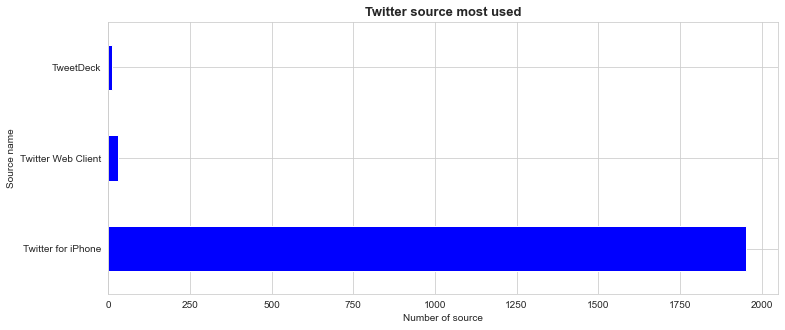

In [99]:
plt.figure(figsize = (12,5))
df_analysis.source.value_counts().plot(kind = 'barh',color = 'blue')
plt.xlabel('Number of source')
plt.ylabel('Source name')
plt.title('Twitter source most used',fontdict={'size':13,'weight':'bold'})
plt.savefig('twitter source')

In [100]:
df_analysis.source.value_counts()

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

 ### Twitter for iPhone has the highest tweet count

### Dog's with most name

In [101]:
df_analysis.name.value_counts()

Charlie       11
Cooper        10
Lucy          10
Oliver        10
Penny          9
              ..
Leela          1
Glenn          1
Shelby         1
Sephie         1
Christoper     1
Name: name, Length: 913, dtype: int64

#### Top 20 dog_names in we rate dogs

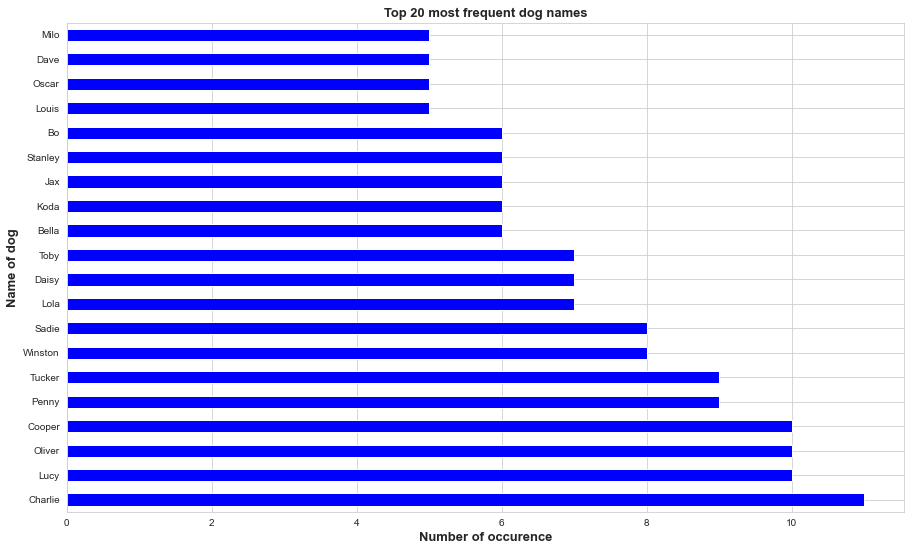

In [102]:
plt.subplots(figsize = (15,9))
df_analysis.name.value_counts().sort_values(ascending=False)[:20].plot(kind = 'barh',color = 'blue')
plt.xlabel('Number of occurence',fontdict={'size':13,'weight':'bold'})
plt.ylabel('Name of dog',fontdict={'size':13,'weight':'bold'});
plt.title('Top 20 most frequent dog names',fontdict={'size':13,'weight':'bold'})
plt.savefig('frequent dog names')

In [103]:
df_analysis[df_analysis.name == 'Charlie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,breed
195,844580511645339650,0.0,0.0,2017-03-22 16:04:20+00:00,Twitter for iPhone,This is Charlie. He wants to know if you have ...,https://twitter.com/dog_rates/status/844580511...,11.0,10.0,Charlie,...,False,dishwasher,0.032489,False,printer,0.016456,False,3533,17871,none
200,842846295480000512,0.0,0.0,2017-03-17 21:13:10+00:00,Twitter for iPhone,This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13.0,10.0,Charlie,...,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True,4023,16440,Labrador_retriever
244,833826103416520705,0.0,0.0,2017-02-20 23:50:09+00:00,Twitter for iPhone,Meet Charlie. She asked u to change the channe...,https://twitter.com/dog_rates/status/833826103...,13.0,10.0,Charlie,...,True,kelpie,0.149706,True,Pembroke,0.096480,True,3904,16728,Chihuahua
252,832369877331693569,0.0,0.0,2017-02-16 23:23:38+00:00,Twitter for iPhone,This is Charlie. He fell asleep on a heating v...,https://twitter.com/dog_rates/status/832369877...,11.0,10.0,Charlie,...,True,German_short-haired_pointer,0.105208,True,Staffordshire_bullterrier,0.054338,True,3652,18792,kelpie
287,827199976799354881,0.0,0.0,2017-02-02 17:00:17+00:00,Twitter for iPhone,This is Charlie. He wins every game of chess h...,https://twitter.com/dog_rates/status/827199976...,13.0,10.0,Charlie,...,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True,2579,11659,Great_Dane
592,771102124360998913,0.0,0.0,2016-08-31 21:47:27+00:00,Twitter for iPhone,This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12.0,10.0,Charlie,...,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True,1663,6898,Labrador_retriever
688,754011816964026368,0.0,0.0,2016-07-15 17:56:40+00:00,Twitter for iPhone,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12.0,10.0,Charlie,...,True,Boston_bull,0.273176,True,boxer,0.056772,True,4079,9726,French_bulldog
1060,703382836347330562,0.0,0.0,2016-02-27 00:55:11+00:00,Twitter for iPhone,This is Charlie. He's a West Side Niddlewog. M...,https://twitter.com/dog_rates/status/703382836...,12.0,10.0,Charlie,...,True,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True,1285,3837,golden_retriever
1132,697255105972801536,0.0,0.0,2016-02-10 03:05:46+00:00,Twitter for iPhone,Meet Charlie. He likes to kiss all the big mil...,https://twitter.com/dog_rates/status/697255105...,10.0,10.0,Charlie,...,True,malinois,0.165888,True,Doberman,0.119890,True,1315,3316,Great_Dane
1344,681891461017812993,0.0,0.0,2015-12-29 17:36:07+00:00,Twitter for iPhone,Say hello to Charlie. He's scholarly af. Quite...,https://twitter.com/dog_rates/status/681891461...,10.0,10.0,Charlie,...,True,doormat,0.134316,False,toy_terrier,0.084482,True,951,2706,Chihuahua


### Dog's most stage

In [104]:
df_analysis.dog_stage.value_counts()

pupper            203
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

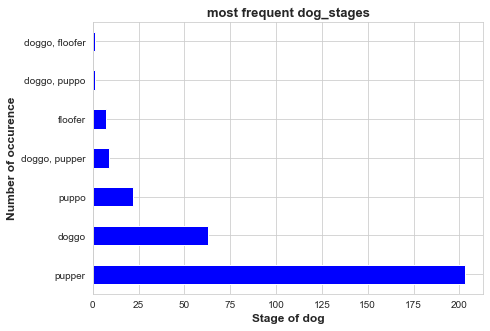

In [105]:
plt.subplots(figsize = (7,5))
df_analysis.dog_stage.value_counts().plot(kind = 'barh',color = 'blue')
plt.xlabel('Stage of dog',fontdict={'size':12,'weight':'bold'})
plt.ylabel('Number of occurence',fontdict={'size':12,'weight':'bold'})
plt.title('most frequent dog_stages',fontdict={'size':13,'weight':'bold'})
plt.savefig('dog_stages')

### Dog's most ratings

In [106]:
df_analysis.rating_numerator.value_counts()

12.0      450
10.0      419
11.0      396
13.0      261
9.0       151
8.0        95
7.0        52
14.0       35
5.0        32
6.0        32
3.0        19
4.0        16
2.0         9
1.0         5
0.0         2
27.0        1
60.0        1
88.0        1
144.0       1
26.0        1
121.0       1
143.0       1
44.0        1
80.0        1
75.0        1
99.0        1
50.0        1
204.0       1
1776.0      1
165.0       1
84.0        1
24.0        1
420.0       1
Name: rating_numerator, dtype: int64

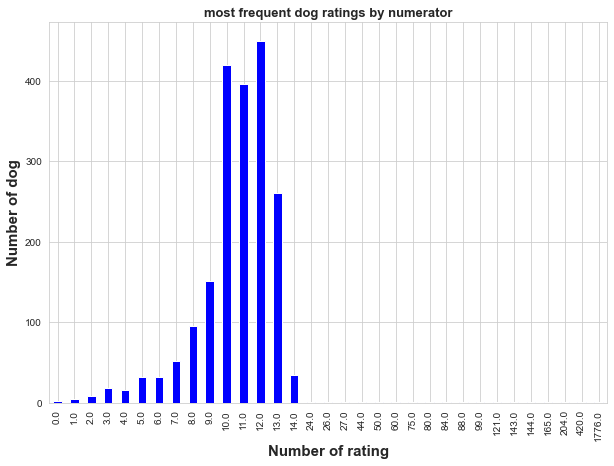

In [107]:
plt.subplots(figsize = (10,7))
df_analysis.rating_numerator.value_counts().sort_index().plot(kind = 'bar',color= 'blue')
plt.xlabel('Number of rating',fontdict={'size':15,'weight':'bold'})
plt.ylabel('Number of dog',fontdict={'size':15,'weight':'bold'})
plt.title('most frequent dog ratings by numerator',fontdict={'size':13,'weight':'bold'})
plt.savefig('most ratings')

### Dog's with most breed

In [108]:
df_analysis.p1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
jersey                  0
coffee_mug              0
fiddler_crab            0
pencil_box              0
envelope                0
Name: p1, Length: 378, dtype: int64

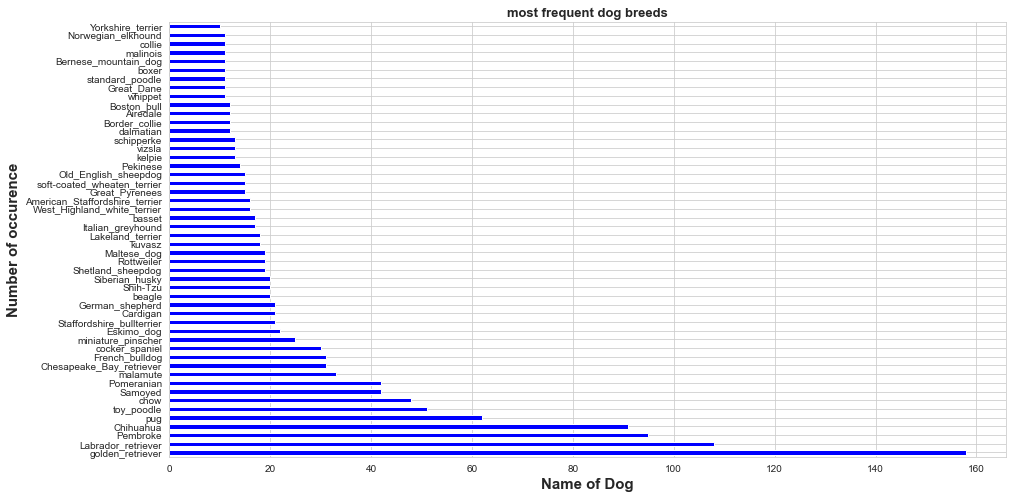

In [109]:
plt.subplots(figsize = (15,8))
df_analysis[df_analysis['breed'] != 'none'].breed.value_counts().sort_values(ascending=False)[:50].plot(kind = 'barh',color = 'blue')
plt.xlabel('Name of Dog',fontdict={'size':15,'weight':'bold'})
plt.ylabel('Number of occurence',fontdict={'size':15,'weight':'bold'});
plt.title('most frequent dog breeds',fontdict={'size':13,'weight':'bold'})
plt.savefig('dog_breeds chart')

### The relationship between retweet count and favourite count

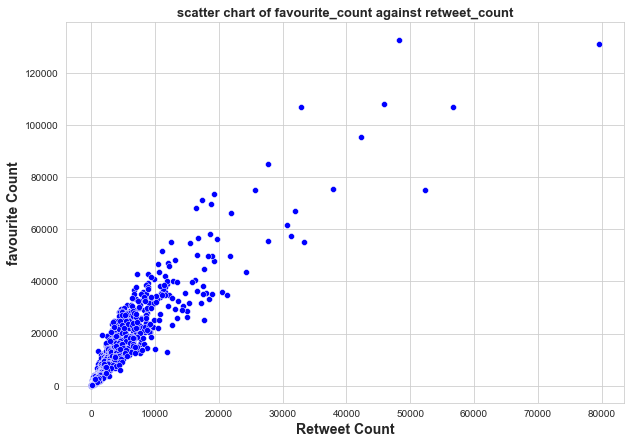

In [110]:
plt.subplots(figsize = (10,7))
sns.scatterplot(df_analysis['retweet_count'],df_analysis['favorite_count'],color = 'blue')
plt.xlabel('Retweet Count',fontdict=dict(weight = 'bold',size = 14))
plt.ylabel('favourite Count',fontdict=dict(weight = 'bold',size = 14))
plt.title('scatter chart of favourite_count against retweet_count',fontdict={'size':13,'weight':'bold'})
plt.savefig('retweet vs favourite')

### The relationship between different we rate dogs attributes

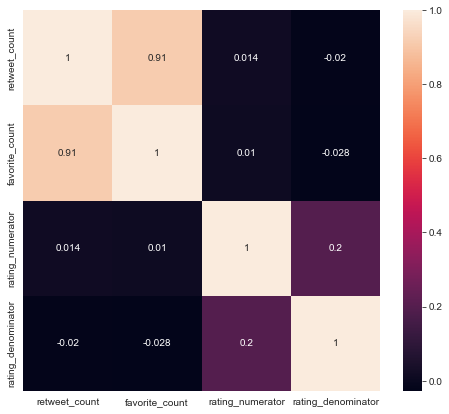

In [111]:
df_corr =  np.array(['retweet_count','favorite_count','rating_numerator','rating_denominator'])
df_corr = df_analysis[df_corr].corr()
plt.figure(figsize = (8,7))
sns.heatmap(df_corr,annot=True);
plt.savefig('heat map of attr')